In [3]:
import compyler as cp

ModuleNotFoundError: No module named 'compyler'

In [2]:
plan = cp.CKKSplan()

a = plan.add("a", 30)
# 1 / a
# b = plan.add("b", 30)

NameError: name 'cp' is not defined

In [10]:
b = (-a + 2)
c = a + 0

In [11]:

    
for i in range(3):
    c = c * (-c + 2)
    b = b * (-c + 2)

In [12]:
plan.compute(b);

Rebuilding the graph...
Executing what possible...
Inserting relinearize nodes...
Padding with copies...


In [13]:
# cp.draw_dot(plan.calc_result)

In [14]:
instr, node2label = plan._transpile2tupleir()

In [15]:
label2node = {}
for node, label in node2label.items():
    label2node[label] = node

In [16]:
for line in instr:
    print(line)

('encode', 'x11', {2 | scale 60 | level 2}, 2)
('encode', 'x30', {2 | scale 60 | level 3}, 1)
('encode', 'x47', {2 | scale 60 | level 3}, 1)
('encode', 'x62', {2 | scale 30 | level 4}, 0)
('encode', 'x64', {2 | scale 60 | level 4}, 0)
('encrypt', 'x213', {a | scale 30 | min_scale 30 | level 4 | depth 0})
('encode', 'x129', {2 | scale 60 | level 4}, 0)
('encode', 'x212', {0 | scale 30 | level 4}, 0)
('encode', 'x205', {2 | scale 30 | level 4}, 0)
('negate', 'x63', 'x213')
('add-plain', 'x210', 'x213', 'x212')
('add-plain', 'x50', 'x63', 'x62')
('negate', 'x206', 'x210')
('modswitch-to', 'x39', 'x50', 1)
('add-plain', 'x192', 'x206', 'x205')
('multiply', 'x176', 'x210', 'x192')
('relin', 'x151', 'x176')
('downscale', 'x89', 'x151', 30)
('negate', 'x65', 'x151')
('negate', 'x128', 'x151')
('add-plain', 'x51', 'x65', 'x64')
('add-plain', 'x106', 'x128', 'x129')
('downscale', 'x40', 'x51', 30)
('downscale', 'x90', 'x106', 30)
('multiply', 'x31', 'x39', 'x40')
('multiply', 'x75', 'x89', 'x90

In [19]:
import numpy as np

a = np.linspace(2**(-12), 1, 2**14)

plain_result = plan.plain_compute({"a": a})
plain_result

array([15.97073648, 15.96343235, 15.95613237, ...,  1.00012206,
        1.00006103,  1.        ])

In [20]:
1 / a

array([4.09600000e+03, 3.27692001e+03, 2.73083335e+03, ...,
       1.00012206e+00, 1.00006103e+00, 1.00000000e+00])

In [21]:
seal_code = plan.transpile2seal()
from IPython.display import display, Markdown
display(Markdown("```python\n" + "\n".join(seal_code) + "\n```"))

```python
import seal

poly_modulus_degree = 32768
parms = seal.EncryptionParameters(seal.scheme_type.ckks)
parms.set_poly_modulus_degree(poly_modulus_degree)
parms.set_coeff_modulus(seal.CoeffModulus.Create(poly_modulus_degree, [60, 40, 40, 40, 40, 60]))
context = seal.SEALContext(parms)

keygen = seal.KeyGenerator(context)
public_key = keygen.create_public_key()
secret_key = keygen.secret_key()
relin_keys = keygen.create_relin_keys()

encryptor = seal.Encryptor(context, public_key)
evaluator = seal.Evaluator(context)
encoder = seal.CKKSEncoder(context)
decryptor = seal.Decryptor(context, secret_key)

_ones = [1.0] * (poly_modulus_degree // 2)

x11 = encoder.encode(float(2), 1.152921504606847e+18)
x11 = evaluator.mod_switch_to_next(x11)
x11 = evaluator.mod_switch_to_next(x11)
x30 = encoder.encode(float(2), 1.152921504606847e+18)
x30 = evaluator.mod_switch_to_next(x30)
x47 = encoder.encode(float(2), 1.152921504606847e+18)
x47 = evaluator.mod_switch_to_next(x47)
x62 = encoder.encode(float(2), 1073741824.0)

x64 = encoder.encode(float(2), 1.152921504606847e+18)

a_plain = encoder.encode(seal.VectorDouble(a), 2**30)
x213 = encryptor.encrypt(a_plain)
x129 = encoder.encode(float(2), 1.152921504606847e+18)

x212 = encoder.encode(float(0), 1073741824.0)

x205 = encoder.encode(float(2), 1073741824.0)

x63 = evaluator.negate(x213)
x212.scale(x213.scale())
x210 = evaluator.add_plain(x213, x212)
x62.scale(x63.scale())
x50 = evaluator.add_plain(x63, x62)
x206 = evaluator.negate(x210)
x39 = evaluator.mod_switch_to_next(x50)
x205.scale(x206.scale())
x192 = evaluator.add_plain(x206, x205)
x176 = evaluator.multiply(x210, x192)
x151 = evaluator.relinearize(x176, relin_keys)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x151.parms_id())
x89 = evaluator.multiply_plain(x151, plain_one)
evaluator.rescale_to_next_inplace(x89)
x65 = evaluator.negate(x151)
x128 = evaluator.negate(x151)
x64.scale(x65.scale())
x51 = evaluator.add_plain(x65, x64)
x129.scale(x128.scale())
x106 = evaluator.add_plain(x128, x129)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x51.parms_id())
x40 = evaluator.multiply_plain(x51, plain_one)
evaluator.rescale_to_next_inplace(x40)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x106.parms_id())
x90 = evaluator.multiply_plain(x106, plain_one)
evaluator.rescale_to_next_inplace(x90)
x31 = evaluator.multiply(x39, x40)
x75 = evaluator.multiply(x89, x90)
x23 = evaluator.relinearize(x31, relin_keys)
x59 = evaluator.relinearize(x75, relin_keys)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x23.parms_id())
x17 = evaluator.multiply_plain(x23, plain_one)
evaluator.rescale_to_next_inplace(x17)
x48 = evaluator.negate(x59)
x29 = evaluator.negate(x59)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x59.parms_id())
x27 = evaluator.multiply_plain(x59, plain_one)
evaluator.rescale_to_next_inplace(x27)
x47.scale(x48.scale())
x37 = evaluator.add_plain(x48, x47)
x30.scale(x29.scale())
x22 = evaluator.add_plain(x29, x30)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x37.parms_id())
x28 = evaluator.multiply_plain(x37, plain_one)
evaluator.rescale_to_next_inplace(x28)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x22.parms_id())
x16 = evaluator.multiply_plain(x22, plain_one)
evaluator.rescale_to_next_inplace(x16)
x21 = evaluator.multiply(x27, x28)
x12 = evaluator.multiply(x16, x17)
x15 = evaluator.relinearize(x21, relin_keys)
x7 = evaluator.relinearize(x12, relin_keys)
x10 = evaluator.negate(x15)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x7.parms_id())
x3 = evaluator.multiply_plain(x7, plain_one)
evaluator.rescale_to_next_inplace(x3)
x11.scale(x10.scale())
x6 = evaluator.add_plain(x10, x11)
plain_one = encoder.encode(_ones, 1024)
evaluator.mod_switch_to_inplace(plain_one, x6.parms_id())
x2 = evaluator.multiply_plain(x6, plain_one)
evaluator.rescale_to_next_inplace(x2)
x0 = evaluator.multiply(x2, x3)
```

In [22]:
label2node["x2"].params

CipherParams(scale=30, min_scale=30, level=1)

In [23]:
%%time

for line in seal_code:
    try:
        exec(line)
    except ValueError:
        print(line)
        raise
        

CPU times: user 424 ms, sys: 57.6 ms, total: 481 ms
Wall time: 489 ms


In [24]:
x0_encrypted_result = encoder.decode(decryptor.decrypt(x0))

In [25]:
plain_result

array([15.97073648, 15.96343235, 15.95613237, ...,  1.00012206,
        1.00006103,  1.        ])

In [26]:
x0_encrypted_result

array([15.97139033, 15.963101  , 15.95589565, ...,  1.00008837,
        1.00002129,  0.99997622])

In [27]:
error = (x0_encrypted_result - plain_result) / plain_result 

Text(0, 0.5, 'Relative error = (encr - plain) / plain')

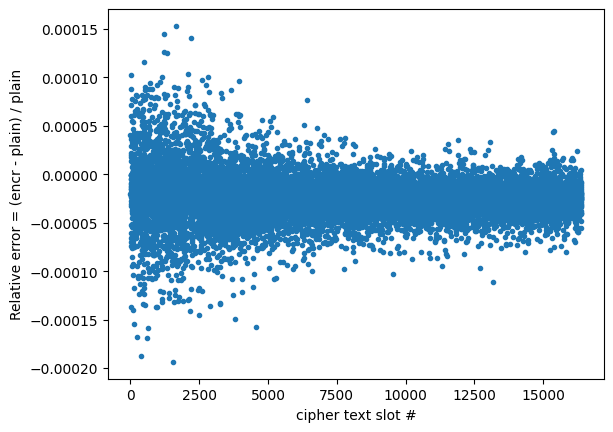

In [28]:
import matplotlib.pyplot as plt
plt.plot((error), ".",)
plt.xlabel("cipher text slot #")
plt.ylabel("Relative error = (encr - plain) / plain")

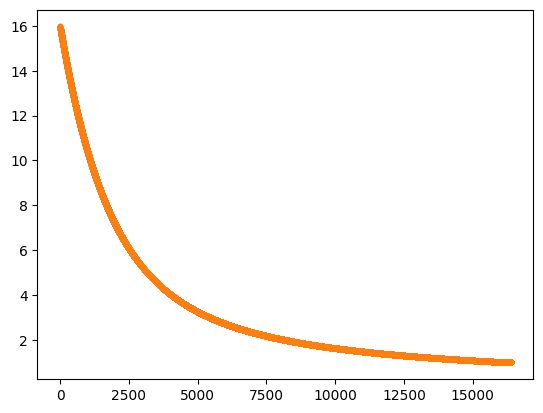

In [29]:
plt.plot(x0_encrypted_result, ".",)
plt.plot(plain_result, ".",)
